In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.util import ngrams
from collections import Counter
from PIL import Image
import numpy as np
from wordcloud import WordCloud

In [2]:
df = pd.read_parquet('/Users/vancescadinh/Documents/Projects/leaders/1_data_collection/trump_second_term_v2.parquet')
df.head(2)

,id,document,document_type,date,title,text,text_embeddings,summary,sentiment,emotions,emotion_labels,topics,entities,intent,emotions_normalized_labels,emotions_normalized,lemmatized_emotions,lemmatized_emotions_clean,entities_clean
0,3,doc_003,remarks,2025-03-24,donald trump and jeff landry of louisiana anno...,"okay, we have a beautiful announcement to make...","[-0.004372930154204369000000, 0.01188070699572...",president trump and louisiana governor jeff la...,positive,"[excited, proud, optimistic]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[hyundai investment, american manufacturing, t...","[donald trump, jeff landry, hyundai motor grou...",the author's intent is to promote president tr...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[excitment, proud, optimistic]","[excitment, proud, optimistic]","[excitement, proud, optimistic]","[donald trump, jeff landry, hyundai motor grou..."
1,402,doc_430,remarks,2024-06-17,donald trump joins a telerally for john mcguir...,"well, thank you very much, john. it's an honor...","[-0.013249367475509644000000, -0.0245644710958...",president trump delivered a passionate tele-ra...,very positive,"[angry, hopeful, confident]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[2024 election, virginia politics, border secu...","[donald trump, john mcguire, bob good, joe bid...",the intent of the text is to persuade voters i...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[angry, hopeful, confidence]","[angry, hopeful, confidence]","[anger, hope, confidence]","[donald trump, john mcguire, bob good, joe bid..."


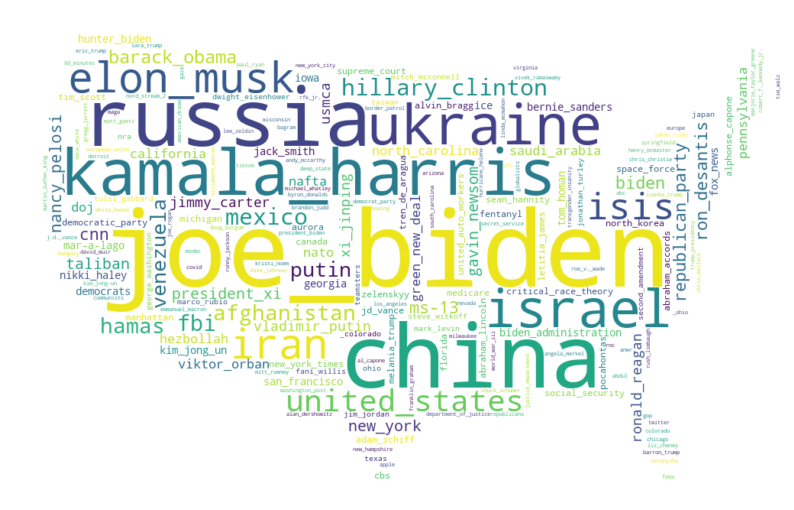

In [3]:
from wordcloud import STOPWORDS

topics_clean = df["entities_clean"].explode()
words = ",".join(topics_clean)
words = "_".join(words.split(" "))
words = words.replace(",", " ")



words_to_remove = {"donald_trump", "(", ")", "."}
filtered_text = [w for w in words.split() if w not in words_to_remove]




# tokens = nltk.word_tokenize(words)
# tokens = " ".join(tokens)

# n_grams = list(ngrams(tokens,1))


# n_grams
# ngrams_string = [" ".join(gram) for gram in n_grams]
# ngrams_string = " ".join(ngrams_string)

ngram_freq = Counter(filtered_text)


# # filtered_ngram_freq = Counter({k: v for k, v in ngram_freq.items() if v < 695})


mask = np.array(Image.open("map.png"))


custom_stopwords = STOPWORDS.union({"donald_trump", "(", ")", "."})



wordcloud = WordCloud(
    width=800,
    height=800,
    background_color='white',
    mask=mask,
    stopwords = custom_stopwords,              
    # contour_width=1,         
    # contour_color='black'    
).generate_from_frequencies(ngram_freq)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()